# Music Generation Using Idyoms

In [1]:
#using DataFrames, Plots, Random
using Plots
using Chakra
include("src/Idyoms.jl")
using Main.Idyoms

### Load Nova from Melch

In [2]:
using Melch
Melch.__INIT__("/Users/nick/Work/MelchData")
nova = fnd(Melch.id(0),Melch)
melodies = pts(nova)
sequences = [sequence(pts(mel,Melch),Melch) for mel in melodies];

### Define Viewpoints

In [3]:
PITCH = vp(Melch.CPITCH)
DUR = vp(Melch.DUR)
PROD = link(PITCH,DUR);

### Generate new sequences

In [4]:
views = [View(seq,PROD,PROD) for seq in sequences];
o = Bounded(5) # order bound
tally, seen = Idyoms.train(views,o);
a = seen
b = Backoff() # smoothing technique
e = C() # escape method
u = false # update exclusion

preds, seq = Idyoms.gen_seq(100,tally,seen,a,b,e,u,o);

### Tabulate sequence

In [5]:
Idyoms.mean_infcontent(preds)

1.3184845849781115

In [6]:
df = Idyoms.todataframe(1,preds)

Row,SeqID,EventID,Symbol,Order,Prob,IC,H
,Int64,Int64,Tuple…,Int64,Float64,Float64,Float64
1,1,1,"(60, 24)",0,0.0417446,4.58227,5.69385
2,1,2,"(62, 12)",1,0.030007,5.05856,4.62947
3,1,3,"(62, 24)",2,0.0687557,3.86238,3.59378
4,1,4,"(62, 24)",2,0.0595741,4.06917,2.47297
5,1,5,"(62, 24)",3,0.47778,1.06558,2.57191
6,1,6,"(62, 48)",3,0.0628413,3.99214,1.61769
7,1,7,"(62, 12)",4,0.666839,0.584589,1.88233
8,1,8,"(62, 12)",5,0.907359,0.140254,0.879581
9,1,9,"(67, 48)",5,0.83295,0.263698,1.29077


### Display information profiles

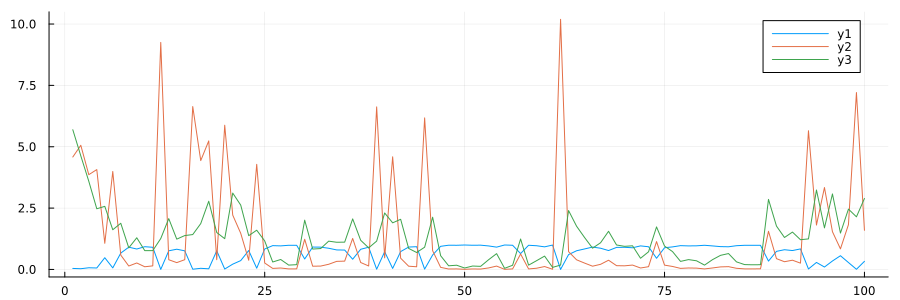

In [7]:
plot(df.Prob)
plot!(df.IC)
plot!(df.H)
plot!(size=(900,300))

### Generate Midi file

In [8]:
using MIDI
function generatemidifile(xs::Vector{Tuple{Int,Int}},name::String)
    tpq = 960
    notes = Note[]
    pos = 0
    for pair in xs
        pitch = pair[1]
        velocity = 100
        dur = Int(tpq*pair[2]/24)
        
        note = Note(pitch,100,pos,dur)
        
        push!(notes,note)
        pos+=dur
    end
    track = MIDITrack()
    addnotes!(track, notes)
    
    midi = MIDIFile(0, tpq, [track])
    cd(@__DIR__)
    save(name, midi)
end

generatemidifile (generic function with 1 method)

In [9]:
generatemidifile(seq,"example1.mid")

MIDIFile (format=0, tpq=960) with 1 tracks

### Generating separate sequences of pitch and duration

In [10]:
pviews = [View(seq,PITCH,PITCH) for seq in sequences];
dviews = [View(seq,DUR,DUR) for seq in sequences]

o = Bounded(5) # order bound

ptally, pseen = Idyoms.train(pviews,o);
dtally, dseen = Idyoms.train(dviews,o);

pa = pseen
da = dseen

b = Backoff() # smoothing technique
e = C() # escape method
u = false # update exclusion

ppreds, pseq = Idyoms.gen_seq(100,ptally,pseen,pa,b,e,u,o);
dpreds, dseq = Idyoms.gen_seq(100,dtally,dseen,da,b,e,u,o);

seq = collect(zip(pseq,dseq))

100-element Vector{Tuple{Int64, Int64}}:
 (63, 12)
 (63, 24)
 (63, 12)
 (67, 24)
 (65, 12)
 (63, 36)
 (60, 12)
 (60, 12)
 (58, 24)
 (58, 12)
 (63, 24)
 (63, 12)
 (63, 24)
 ⋮
 (69, 12)
 (69, 12)
 (66, 36)
 (62, 12)
 (66, 12)
 (69, 12)
 (74, 36)
 (69, 12)
 (67, 12)
 (65, 12)
 (62, 36)
 (72, 12)

In [11]:
generatemidifile(seq,"example2.mid")

MIDIFile (format=0, tpq=960) with 1 tracks